<a href="https://colab.research.google.com/github/BryanAlexanderSoetanto/Portfolio-Data-Analytics-Essentials/blob/main/CodePertemuan3ReadingInterest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset berhasil dibaca. Jumlah baris: 140
Kolom numerik yang digunakan: ['Reading Frequency per week', 'Number of Readings per Quarter', 'Daily Reading Duration (in minutes)', 'Internet Access Frequency per Week', 'Daily Internet Duration (in minutes)', 'Tingkat Kegemaran Membaca (Reading Interest)']
Jumlah baris sebelum: 140
Jumlah baris sesudah: 113

Ringkasan data sesudah pembersihan:
       Reading Frequency per week  Number of Readings per Quarter  \
count                  113.000000                      113.000000   
mean                     4.738938                        4.327434   
std                      0.463379                        1.229783   
min                      4.000000                        2.000000   
25%                      4.500000                        3.500000   
50%                      5.000000                        4.500000   
75%                      5.000000                        5.500000   
max                      5.500000                       

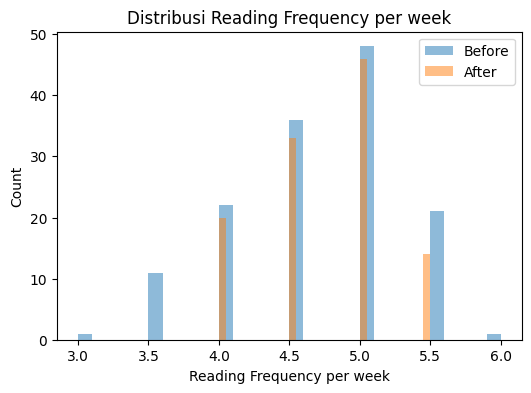

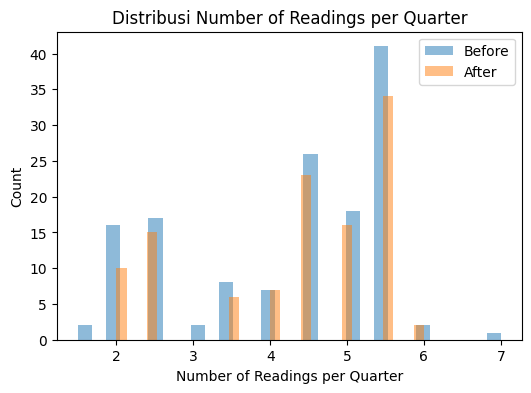

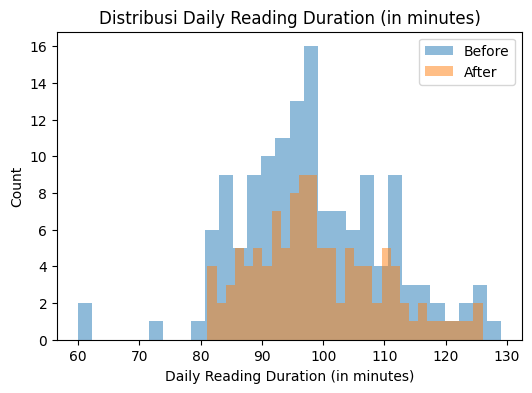

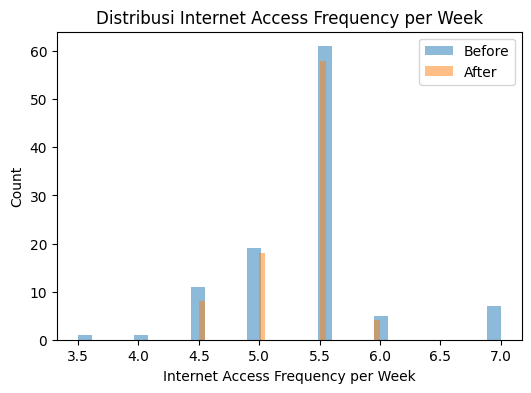

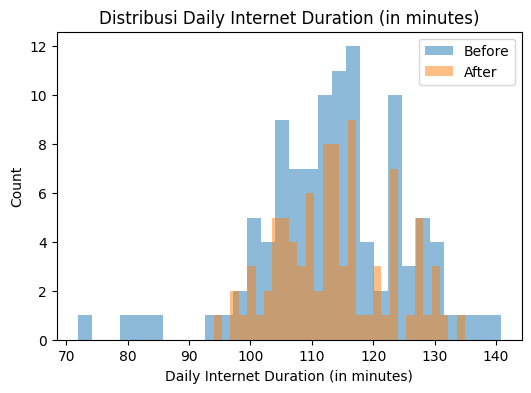

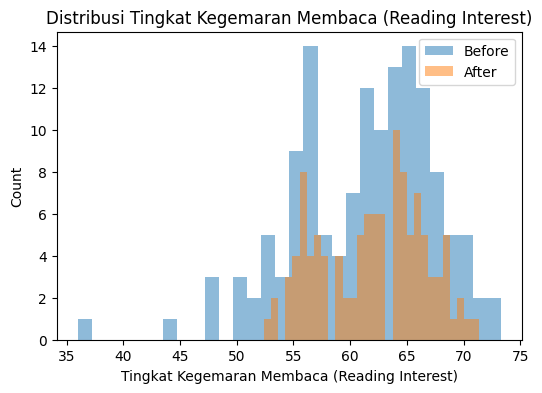

Dataset bersih disimpan sebagai 'TGM_2020-2023_clean.csv'

KESIMPULAN:
- Metode IQR digunakan untuk mendeteksi dan menghapus data pencilan (outlier).
- Dataset menjadi lebih representatif dan siap digunakan untuk analisis lebih lanjut.
- File hasil preprocessing telah disimpan dalam format CSV.



In [ ]:
# === Laporan Preprocessing Data: Minat Baca 2020–2023 ===
# Dataset: TGM_2020-2023_eng.csv
# Tujuan: Membersihkan data dan menghapus outlier menggunakan metode IQR

# ===========================
# 1. Import Library
# ===========================
import pandas as pd
import matplotlib.pyplot as plt

# ===========================
# 2. Membaca Dataset
# ===========================
df = pd.read_csv("TGM 2020-2023_eng.csv", encoding="utf-8-sig", sep=';')
print("Dataset berhasil dibaca. Jumlah baris:", len(df))

# ===========================
# 3. Pilih Kolom Numerik
# ===========================
numeric_cols = [
    "Reading Frequency per week",
    "Number of Readings per Quarter",
    "Daily Reading Duration (in minutes)",
    "Internet Access Frequency per Week",
    "Daily Internet Duration (in minutes)",
    "Tingkat Kegemaran Membaca (Reading Interest)"
]
numeric_cols = [c for c in numeric_cols if c in df.columns]
print("Kolom numerik yang digunakan:", numeric_cols)

# ===========================
# 4. Konversi Nilai ke Numerik
# ===========================
# Mengubah koma menjadi titik dan konversi ke float
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(",", ".", regex=False), errors="coerce")

# ===========================
# 5. Fungsi IQR
# ===========================
def iqr_bounds(series):
    q1, q3 = series.quantile(0.25), series.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return lower, upper

# ===========================
# 6. Hapus Outlier Berdasarkan IQR
# ===========================
clean = df.copy()
for col in numeric_cols:
    lb, ub = iqr_bounds(clean[col].dropna())
    clean = clean[(clean[col].isna()) | ((clean[col] >= lb) & (clean[col] <= ub))]

# ===========================
# 7. Bandingkan Sebelum & Sesudah
# ===========================
print("Jumlah baris sebelum:", len(df))
print("Jumlah baris sesudah:", len(clean))
print("\nRingkasan data sesudah pembersihan:")
print(clean[numeric_cols].describe())

# ===========================
# 8. Visualisasi Distribusi Sebelum & Sesudah
# ===========================
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30, alpha=0.5, label="Before")
    plt.hist(clean[col].dropna(), bins=30, alpha=0.5, label="After")
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend()
    plt.show()

# ===========================
# 9. Simpan Dataset Bersih
# ===========================
clean.to_csv("TGM_2020-2023_clean.csv", index=False)
print("Dataset bersih disimpan sebagai 'TGM_2020-2023_clean.csv'")

# ===========================
# 10. Kesimpulan
# ===========================
print("""
KESIMPULAN:
- Metode IQR digunakan untuk mendeteksi dan menghapus data ekstrim (outlier).
- Dataset menjadi lebih representatif dan siap digunakan untuk analisis lebih lanjut.
- File hasil preprocessing telah disimpan dalam format CSV.
""")